## Домашнее задание 2, часть 2 ##
Как обычно, сначала импорты и инстоллы:

In [1]:
# ! pip install wordcloud
# nltk.download('stopwords')
import pandas as pd
import nltk
import collections
import matplotlib.pyplot as plt
import numpy
import requests
%matplotlib inline
from PIL import Image
from pprint import pprint
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams
from pymorphy2 import MorphAnalyzer
from wordcloud import WordCloud

### Пункт 1. Перевод разметки в датафрейм ###
Для этого я взяла разметку от Пайморфи, потому что оттуда удобнее вытаскивать значения. Т.к. в первой части задания я записала в json файл только лемму и часть речи, тут мне приходится заново проводить разметку.

In [2]:
morph = MorphAnalyzer()
with open('По ту сторону поводка.txt', encoding='UTF-8') as f:
    text = f.read()
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]

Названия колонок - основные характеристики слова. По умолчанию колонки сортируются по алфавиту, поэтому применяю метод reindex, задав нужный мне порядок.

In [3]:
table = []
for word in words:
    result = morph.parse(word)
    first = result[0]
    char_list = {'Word': first.word,
                 'Lemma': first.normal_form,
                 'POS': first.tag.POS,
                 'Case': first.tag.case,
                 'Gender': first.tag.gender,
                 'Animacy': first.tag.animacy,
                 'Number': first.tag.number,
                 'Person': first.tag.person,
                 'Tense': first.tag.tense,
                 'Involvement': first.tag.involvement,
                 'Mood': first.tag.mood,
                 'Transitivity': first.tag.transitivity,
                 'Voice': first.tag.voice,
                 'Aspect': first.tag.aspect} 
    table.append(char_list)
titles = ['Word', 'Lemma', 'POS', 'Case', 'Gender', 'Animacy', 'Number', 'Person', 'Tense',
          'Involvement', 'Mood', 'Transitivity', 'Voice', 'Aspect']
df = pd.DataFrame(table)
df = df.reindex(columns = titles)
df

,Word,Lemma,POS,Case,Gender,Animacy,Number,Person,Tense,Involvement,Mood,Transitivity,Voice,Aspect
0,по,по,PREP,None,None,None,None,None,None,None,None,None,None,None
1,ту,тот,ADJF,accs,femn,None,sing,None,None,None,None,None,None,None
2,сторону,сторона,NOUN,accs,femn,inan,sing,None,None,None,None,None,None,None
3,поводка,поводок,NOUN,gent,masc,inan,sing,None,None,None,None,None,None,None
4,как,как,CONJ,None,None,None,None,None,None,None,None,None,None,None
5,понять,понять,INFN,None,None,None,None,None,None,None,None,tran,None,perf
6,собаку,собака,NOUN,accs,femn,anim,sing,None,None,None,None,None,None,None
7,и,и,CONJ,None,None,None,None,None,None,None,None,None,None,None
8,стать,стать,INFN,None,None,None,None,None,None,None,None,intr,None,perf
9,понятным,понятный,ADJF,datv,None,None,plur,None,None,None,None,None,None,None


### Пункт 2. Повторить какие-то из графиков с семинара ###
Первый график - топ-10 прилагательных.

При первом построении в результатах оказались одни местоимения, поэтому я убрала стоп-слова. Но увы, в списке от nltk оказалось совсем не то, что частотно в моём тексте, и местоимения всё равно оказались в топе выдачи, кроме последнего места.

In [4]:
X = []
Y = []
adjs = []
sw = stopwords.words('russian')
filtered = [w for w in words if w not in sw]
for word in filtered:
    result = morph.parse(word)
    first = result[0]
    if first.tag.POS == 'ADJF':
        adjs.append(first.normal_form)
top_adjs = collections.Counter(adjs)
for i, adj in enumerate(sorted(top_adjs, key=top_adjs.get, reverse=True)):
    if i < 10:
        X.append(adj)
        Y.append(top_adjs[adj])

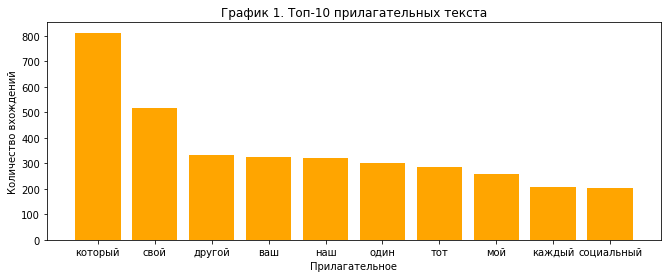

In [5]:
plt.figure(figsize=(11, 4))
plt.bar(X, Y, color='orange')
plt.title('График 1. Топ-10 прилагательных текста')
plt.ylabel('Количество вхождений')
plt.xlabel('Прилагательное')
plt.show()

А теперь ради интереса анти-топ-10:

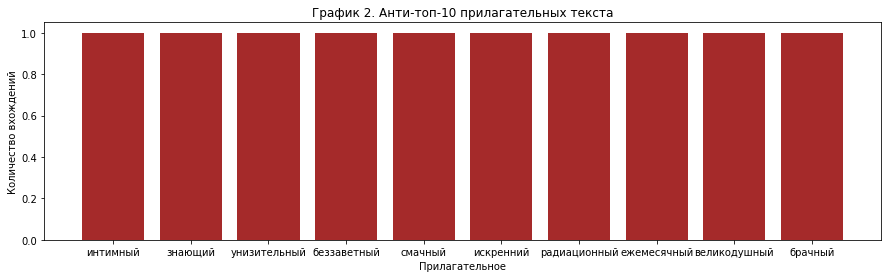

In [6]:
x = []
y = []
for i, adj in enumerate(sorted(top_adjs, key=top_adjs.get, reverse=False)):
    if i < 10:
        x.append(adj)
        y.append(top_adjs[adj])
plt.figure(figsize=(15, 4))
plt.bar(x, y, color='brown')
plt.title('График 2. Анти-топ-10 прилагательных текста')
plt.ylabel('Количество вхождений')
plt.xlabel('Прилагательное')
plt.show()

Третий и четвёртый графики - соотношение времени у глаголов и соотношение частей речи в тексте.

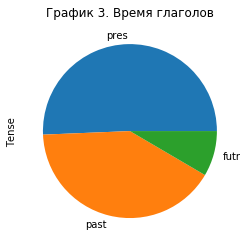

In [7]:
plt.figure(figsize=(4, 4))
df['Tense'].value_counts().plot(kind='pie')
plt.title('График 3. Время глаголов')
plt.show()

Разные размеры графиков под разное количество данных.

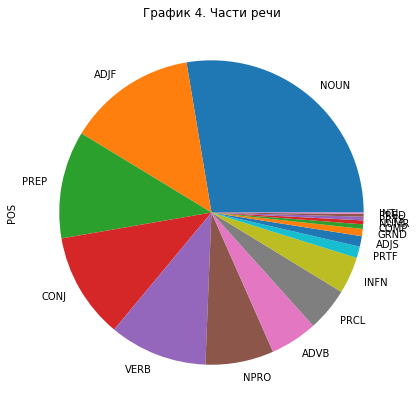

In [8]:
plt.figure(figsize=(7, 7))
df['POS'].value_counts().plot(kind='pie')
plt.title('График 4. Части речи')
plt.show()

И пятым идёт облако слов в форме отпечатка собаки, который взят с сайта clker.com:

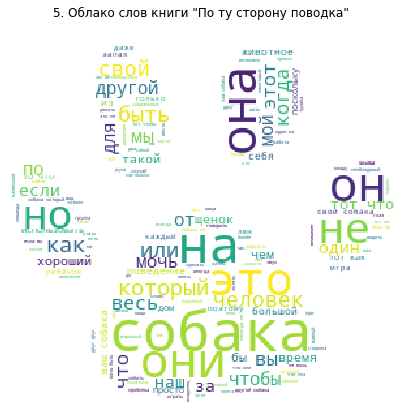

In [19]:
lemmas = ' '.join(df['Lemma'])
link = 'http://www.clker.com/cliparts/d/1/6/9/12198089941045791114animal%20footprint.svg.med.png'
mask = numpy.array(Image.open(requests.get(link, stream=True).raw))
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800,
    mask=mask
).generate(lemmas)

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('5. Облако слов книги "По ту сторону поводка" \n')
plt.show()

### Пункт 3. Придумать 2 своих визуализации ###
Шестой график - сравнение топ-10 существительных, глаголов и прилагательных.

Существительные и глаголы отбираю по-новой, список прилагательных уже был создан ранее.

In [10]:
nouns = []
verbs = []
for word in words:
    result = morph.parse(word)
    first = result[0]
    if first.tag.POS == 'NOUN':
        nouns.append(first.normal_form)
    if first.tag.POS == 'VERB':
        verbs.append(first.normal_form)

In [11]:
X1 = []
Y1 = []
X2 = []
Y2 = []
X3 = []
Y3 = []
top_nouns = collections.Counter(nouns)
for i, noun in enumerate(sorted(top_nouns, key=top_nouns.get, reverse=True)):
    if i < 10:
        Y1.append(noun)
        X1.append(top_nouns[noun])
top_verbs = collections.Counter(verbs)
for i, verb in enumerate(sorted(top_verbs, key=top_verbs.get, reverse=True)):
    if i < 10:
        Y2.append(verb)
        X2.append(top_verbs[verb])
for i, adj in enumerate(sorted(top_adjs, key=top_adjs.get, reverse=True)):
    if i < 10:
        Y3.append(adj)
        X3.append(top_adjs[adj])

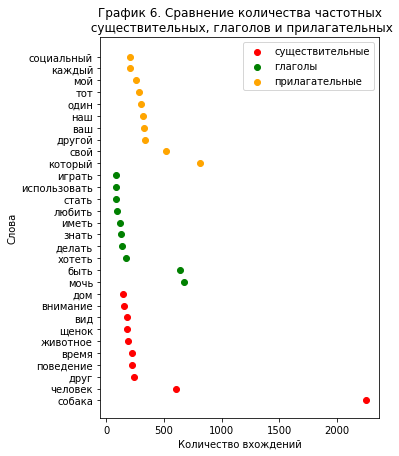

In [12]:
plt.figure(figsize=(5, 7))
plt.scatter(X1, Y1, color='red', label='существительные')
plt.scatter(X2, Y2, color='green', label='глаголы')
plt.scatter(X3, Y3, color='orange', label='прилагательные')
plt.title('График 6. Сравнение количества частотных\n существительных, глаголов и прилагательных')
plt.ylabel('Слова')
plt.xlabel('Количество вхождений')
plt.legend(loc='best')
plt.show()

По результатам видно, что в каждом топ-10 есть по два явных лидера, а среди всех трёх частей речи с огромным отрывом побеждает слово "собака".

Следующий график. Узнаем, сколько раз автор упоминает каждую из своих четырёх собак.

Сначала делаю наглядный датафрейм:

In [13]:
counts = collections.Counter(words)
dogs = [{'Имя собаки': 'Тулип', 'Число упоминаний': counts['тулип']},
             {'Имя собаки': 'Люк', 'Число упоминаний': counts['люк']},
             {'Имя собаки': 'Лесси', 'Число упоминаний': counts['лесси']},
             {'Имя собаки': 'Пип', 'Число упоминаний': counts['пип']}]
df_dogs = pd.DataFrame(dogs)
df_dogs

,Имя собаки,Число упоминаний
0,Тулип,100
1,Люк,77
2,Лесси,42
3,Пип,92


А теперь сам график:

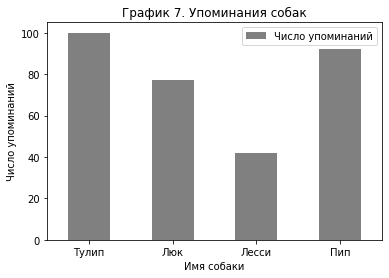

In [14]:
chart = df_dogs.plot.bar(x='Имя собаки', y='Число упоминаний', rot=0, color='grey')
plt.title('График 7. Упоминания собак')
plt.ylabel('Число упоминаний')
plt.xlabel('Имя собаки')
plt.show()

### Пункт 4. NLTK Dispersion Plot ### 
Снова посмотрим на упоминания собак автора, а также самого слова "собака".

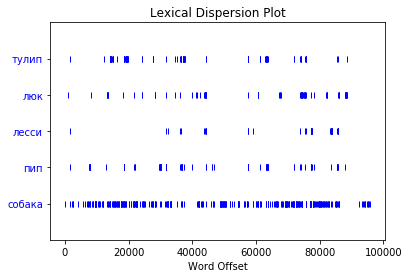

In [15]:
mytext = nltk.Text(words)  
mytext.dispersion_plot(['тулип', 'люк', 'лесси', 'пип', 'собака'])

Спасибо за внимание! Было очень увлекательно анализировать интересную книгу и получать осмысленные результаты.